In [ ]:
## PCA

In [ ]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt, seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/india-districts-census-2011.csv')
df.sample(5)


,District code,State name,District name,Population,Male,Female,Literate,Male_Literate,Female_Literate,SC,...,Power_Parity_Rs_90000_150000,Power_Parity_Rs_45000_150000,Power_Parity_Rs_150000_240000,Power_Parity_Rs_240000_330000,Power_Parity_Rs_150000_330000,Power_Parity_Rs_330000_425000,Power_Parity_Rs_425000_545000,Power_Parity_Rs_330000_545000,Power_Parity_Above_Rs_545000,Total_Power_Parity
113,114,RAJASTHAN,Jaisalmer,669919,361708,308211,308653,210415,98238,99134,...,278,587,36,41,77,49,79,128,86,986
520,521,MAHARASHTRA,Pune,9429408,4924105,4505303,7171723,3940210,3231513,1180703,...,6261,10190,2831,1949,4780,2727,3272,5999,5349,27223
620,621,TAMIL NADU,Pudukkottai,1618345,803188,815157,1110545,608776,501769,284804,...,636,1641,282,229,511,86,132,218,92,2812
416,417,CHHATTISGARH,Bijapur,255230,128663,126567,86919,54076,32843,10122,...,383,911,71,23,94,19,30,49,40,1387
198,199,UTTAR PRADESH,Mirzapur,2496970,1312302,1184668,1428683,865837,562846,661129,...,679,1703,176,245,421,160,52,212,52,2875


In [ ]:
df.shape

(640, 118)

In [ ]:
df.describe()

,District code,Population,Male,Female,Literate,Male_Literate,Female_Literate,SC,Male_SC,Female_SC,...,Power_Parity_Rs_90000_150000,Power_Parity_Rs_45000_150000,Power_Parity_Rs_150000_240000,Power_Parity_Rs_240000_330000,Power_Parity_Rs_150000_330000,Power_Parity_Rs_330000_425000,Power_Parity_Rs_425000_545000,Power_Parity_Rs_330000_545000,Power_Parity_Above_Rs_545000,Total_Power_Parity
count,640.000000,6.400000e+02,6.400000e+02,6.400000e+02,6.400000e+02,6.400000e+02,6.400000e+02,6.400000e+02,6.400000e+02,6.400000e+02,...,640.000000,640.000000,640.000000,640.000000,640.000000,640.000000,640.000000,640.000000,640.000000,640.000000
mean,320.500000,1.891961e+06,9.738598e+05,9.181011e+05,1.193186e+06,6.793182e+05,5.138675e+05,3.146537e+05,1.617739e+05,1.528798e+05,...,786.046875,1696.456250,294.000000,215.300000,509.300000,194.204688,261.245313,455.450000,279.631250,3315.412500
std,184.896367,1.544380e+06,8.007785e+05,7.449864e+05,1.068583e+06,5.924144e+05,4.801816e+05,3.129818e+05,1.611216e+05,1.520336e+05,...,1038.854733,1720.535151,638.345281,362.684243,968.538748,424.108001,587.279450,1007.364839,1050.934537,4638.568719
min,1.000000,8.004000e+03,4.414000e+03,3.590000e+03,4.436000e+03,2.614000e+03,1.822000e+03,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000
25%,160.750000,8.178610e+05,4.171682e+05,4.017458e+05,4.825982e+05,2.764365e+05,2.008920e+05,8.320850e+04,4.230700e+04,4.267175e+04,...,236.750000,589.000000,59.000000,24.750000,95.000000,19.000000,21.000000,44.000000,18.000000,1024.250000
50%,320.500000,1.557367e+06,7.986815e+05,7.589200e+05,9.573465e+05,5.483525e+05,4.038590e+05,2.460160e+05,1.255485e+05,1.178550e+05,...,518.000000,1220.500000,149.000000,118.500000,278.000000,84.000000,85.500000,186.500000,60.500000,2238.500000
75%,480.250000,2.583551e+06,1.338604e+06,1.264277e+06,1.602260e+06,9.188582e+05,6.641550e+05,4.477078e+05,2.284602e+05,2.140502e+05,...,941.250000,2233.250000,296.500000,262.000000,564.500000,213.250000,293.000000,497.000000,215.500000,3959.000000
max,640.000000,1.106015e+07,5.865078e+06,5.195070e+06,8.227161e+06,4.591396e+06,3.635765e+06,2.464032e+06,1.266504e+06,1.197528e+06,...,10334.000000,13819.000000,10835.000000,3595.000000,14430.000000,5027.000000,7597.000000,12624.000000,18289.000000,60163.000000


In [ ]:
df.dtypes.unique()

array([dtype('int64')], dtype=object)

In [ ]:
int_col = df.select_dtypes(include=['int64']).columns
flt_col = df.select_dtypes(include=['O']).columns
obj_col = df.select_dtypes(include=['object']).columns

In [ ]:
int_col

Index(['District code', 'Population', 'Male', 'Female', 'Literate',
       'Male_Literate', 'Female_Literate', 'SC', 'Male_SC', 'Female_SC',
       ...
       'Power_Parity_Rs_90000_150000', 'Power_Parity_Rs_45000_150000',
       'Power_Parity_Rs_150000_240000', 'Power_Parity_Rs_240000_330000',
       'Power_Parity_Rs_150000_330000', 'Power_Parity_Rs_330000_425000',
       'Power_Parity_Rs_425000_545000', 'Power_Parity_Rs_330000_545000',
       'Power_Parity_Above_Rs_545000', 'Total_Power_Parity'],
      dtype='object', length=116)

In [ ]:
df.drop(['State name', 'District name'],axis = 1,inplace = True)

In [ ]:
df.sample()

,District code,Population,Male,Female,Literate,Male_Literate,Female_Literate,SC,Male_SC,Female_SC,...,Power_Parity_Rs_90000_150000,Power_Parity_Rs_45000_150000,Power_Parity_Rs_150000_240000,Power_Parity_Rs_240000_330000,Power_Parity_Rs_150000_330000,Power_Parity_Rs_330000_425000,Power_Parity_Rs_425000_545000,Power_Parity_Rs_330000_545000,Power_Parity_Above_Rs_545000,Total_Power_Parity
24,25,31564,16588,14976,21845,12897,8948,2235,1154,1081,...,17,36,6,2,8,3,5,8,9,67


In [ ]:
df.isna().sum()

District code                    0
Population                       0
Male                             0
Female                           0
Literate                         0
                                ..
Power_Parity_Rs_330000_425000    0
Power_Parity_Rs_425000_545000    0
Power_Parity_Rs_330000_545000    0
Power_Parity_Above_Rs_545000     0
Total_Power_Parity               0
Length: 116, dtype: int64

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
df = MinMaxScaler().fit_transform(df)

In [ ]:
df

array([[0.00000000e+00, 7.80255849e-02, 8.01574702e-02, ...,
        6.65399240e-03, 8.20165127e-04, 1.84526382e-02],
       [1.56494523e-03, 6.74747814e-02, 6.71642326e-02, ...,
        9.82256020e-03, 9.84198152e-04, 1.75715663e-02],
       [3.12989045e-03, 1.13537247e-02, 1.27215961e-02, ...,
        2.69328264e-03, 9.29520477e-04, 3.87339163e-03],
       ...,
       [9.96870110e-01, 2.60926749e-03, 2.78347300e-03, ...,
        1.50506971e-02, 4.59292471e-03, 5.22326030e-02],
       [9.98435055e-01, 8.83023240e-03, 8.60772773e-03, ...,
        1.50506971e-02, 4.59292471e-03, 5.22326030e-02],
       [1.00000000e+00, 2.08229281e-02, 2.09650306e-02, ...,
        6.03612167e-02, 2.05588058e-02, 9.59703428e-02]])

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
pca = PCA(n_components = None)

In [ ]:
pca.fit_transform(df)

array([[-8.79068686e-01, -5.50304069e-02,  3.19648633e-01, ...,
        -2.15486782e-16, -1.90544323e-16,  6.35822056e-17],
       [-8.98668374e-01, -3.18596772e-02,  3.93299513e-01, ...,
         9.87097845e-18,  3.46554033e-17,  5.57802592e-16],
       [-1.20758779e+00,  4.39254013e-02,  2.97946910e-01, ...,
        -1.20340003e-17, -6.94738218e-17, -1.18459033e-16],
       ...,
       [-1.09728532e+00,  3.41116374e-01, -1.78270562e-01, ...,
         6.75744511e-19,  1.66554196e-16, -4.21703365e-17],
       [-1.05417499e+00,  3.36826558e-01, -1.74891097e-01, ...,
         2.09743544e-17,  2.27411462e-17, -3.82234166e-17],
       [-9.44061785e-01,  4.20904074e-01, -1.29241805e-01, ...,
         9.67225963e-18,  2.96923425e-18, -4.09069857e-18]])

In [ ]:
# features sorted based on eigenvalues
pca.explained_variance_

array([1.05803115e+00, 1.90893319e-01, 1.28178266e-01, 6.92889345e-02,
       5.42696975e-02, 3.66189752e-02, 3.51854220e-02, 2.16713715e-02,
       1.95274857e-02, 1.73990888e-02, 1.53734674e-02, 1.22254702e-02,
       1.09715938e-02, 1.00660122e-02, 8.51259027e-03, 8.12337783e-03,
       7.68386578e-03, 6.76978808e-03, 6.13182823e-03, 5.46954173e-03,
       5.00833656e-03, 4.80762818e-03, 4.41626669e-03, 4.14899748e-03,
       3.94407223e-03, 3.55442140e-03, 3.08657445e-03, 2.94032831e-03,
       2.77653156e-03, 2.61301367e-03, 2.55427855e-03, 2.31656432e-03,
       2.00536400e-03, 1.97093644e-03, 1.90669516e-03, 1.74423143e-03,
       1.40667935e-03, 1.31416585e-03, 1.20162208e-03, 1.15122582e-03,
       1.10453613e-03, 1.02207920e-03, 9.17772201e-04, 8.96610454e-04,
       8.10060546e-04, 6.95423120e-04, 6.48864520e-04, 6.07572699e-04,
       5.67326425e-04, 5.26168139e-04, 4.74848595e-04, 4.38879137e-04,
       4.28828238e-04, 3.78554145e-04, 2.84684915e-04, 2.77103395e-04,
      

In [ ]:
# Percentage contribution of each feature
pca.explained_variance_ratio_

array([5.91070447e-01, 1.06642796e-01, 7.16069513e-02, 3.87083514e-02,
       3.03178356e-02, 2.04572371e-02, 1.96563808e-02, 1.21067393e-02,
       1.09090547e-02, 9.72002309e-03, 8.58840710e-03, 6.82977446e-03,
       6.12929482e-03, 5.62339055e-03, 4.75556939e-03, 4.53813536e-03,
       4.29260140e-03, 3.78195073e-03, 3.42555365e-03, 3.05556645e-03,
       2.79791359e-03, 2.68578760e-03, 2.46715301e-03, 2.31784272e-03,
       2.20336097e-03, 1.98568204e-03, 1.72431875e-03, 1.64261815e-03,
       1.55111289e-03, 1.45976341e-03, 1.42695096e-03, 1.29415160e-03,
       1.12029915e-03, 1.10106615e-03, 1.06517768e-03, 9.74417107e-04,
       7.85843206e-04, 7.34160425e-04, 6.71287706e-04, 6.43133769e-04,
       6.17050512e-04, 5.70985846e-04, 5.12714608e-04, 5.00892571e-04,
       4.52541355e-04, 3.88499011e-04, 3.62488990e-04, 3.39421262e-04,
       3.16937630e-04, 2.93944500e-04, 2.65274772e-04, 2.45180388e-04,
       2.39565441e-04, 2.11479755e-04, 1.59039590e-04, 1.54804164e-04,
      

In [ ]:
df.shape

(640, 116)

Text(0.5, 1.0, 'Scree plot')

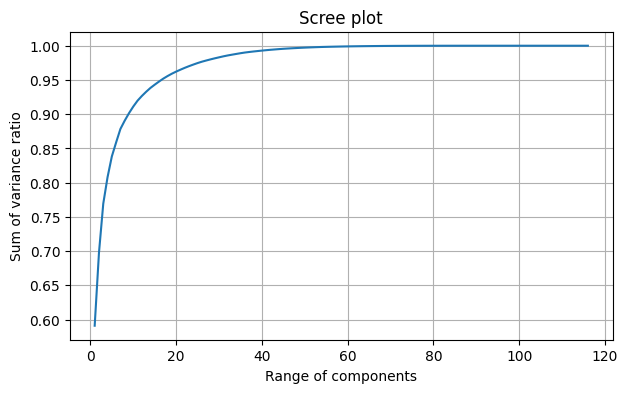

In [ ]:
# Variance Vs Component plot
import matplotlib.pyplot as plt
import numpy as np
plt.figure(figsize=(7,4))
plt.plot(range(1,117,1),np.cumsum(pca.explained_variance_ratio_))
plt.ylabel('Sum of variance ratio')
plt.xlabel('Range of components')
plt.grid()
plt.title('Scree plot')

In [ ]:
# Choosing the optimal component to be 11 as per the plot. 11 components are addressing 98% of the variance
pca = PCA(n_components=40)
pca.fit(df)

PCA(n_components=40)

In [ ]:
pca.explained_variance_ratio_.cumsum()

array([0.59107045, 0.69771324, 0.76932019, 0.80802855, 0.83834638,
       0.85880362, 0.87846   , 0.89056674, 0.90147579, 0.91119582,
       0.91978422, 0.926614  , 0.93274329, 0.93836668, 0.94312225,
       0.94766039, 0.95195299, 0.95573494, 0.95916049, 0.96221606,
       0.96501397, 0.96769976, 0.97016691, 0.97248476, 0.97468812,
       0.9766738 , 0.97839812, 0.98004074, 0.98159185, 0.98305161,
       0.98447856, 0.98577271, 0.98689301, 0.98799407, 0.98905922,
       0.99003361, 0.99081922, 0.99155298, 0.99222408, 0.99286595])